<a href="https://colab.research.google.com/github/liminovna/DataViz_R_notebooks/blob/main/R_assgnt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3. Тестирование гипотез. t-test. Корреляции

Пожалуйста, впишите ниже ваше имя и фамилию:

     Владислава Ли-Мин

## 1. Частотность и фонетика

### 1.0 t-test

С помощью t-критерия Стьюдента мы хотим определить статистическую значимость различия значений применительно к следующим переменным:

a. word durarion in fast condition and word duration in slow condition,

b. segment duration in fast condition and segment duration in slow condition.

Что мы хотим проверить, используя t-критерия Стьюдента?

1) что если мы возьмем любую другую выборку, то в ней средние по этим переменным будут различаться

2) что различие этих длительностей имеет место не только на выборках, но и в генеральной совокупности

3) мы хотим подтвердить, что наша нулевая гипотеза верна

```
С помощью t-критерия Стьюдента мы хотим проверить (2),
что различие этих длительностей имеет место не только на выборках, но и в генеральной совокупности  
```

In [21]:
library(tibble)
library(tidyr)
library(tidyverse)
library(dplyr)

In [22]:
df <- read_csv('https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/dur_word_frequency.csv')
dplyr::sample_n(df, 10)

New names:
• `` -> `...1`
Rows: 832 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Lemma, Participant, Cond, Exponent
dbl (4): ...1, LogDurationA, LogDurationW, Frequency

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,LogDurationA,LogDurationW,Lemma,Participant,Cond,Exponent,Frequency
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
3800,-1.789072,-0.6539072,schad,Art_02_S10,fast,en,-4.996467
3821,-1.832706,-0.6161676,schlaf,Art_02_S10,fast,en,-4.676302
3384,-1.519721,-0.4942799,bahn,Art_02_S09,slow,n,-5.792931
2763,-1.527047,-0.4155003,mahn,Art_02_S08,fast,en,-5.813832
2144,-1.843392,-0.5276158,schlaf,Art_02_S05,fast,en,-4.676302
671487,-1.667638,-0.6824654,lahm,Art_02_S23,fast,t,-6.469370
9530,-1.934705,-0.5821858,zahl,Art_02_S23,fast,en,-4.275480
4162,-1.533522,-0.5978188,schab,Art_02_S10,fast,en,-6.697725
746958,-1.950248,-0.6539072,zahn,Art_02_S17,fast,t,-7.537394


In [3]:
# разделяем изначальный датасет на два по условию
df_slow <- df %>%
  filter(Cond == 'slow')

df_fast <- df %>%
  filter(Cond == 'fast')

### 1.1a Гипотеза (LogDurationW)

```
H0: mean(WD) in fast condition = mean(WD) in slow condition
H1: mean(WD) in fast condition != mean(WD) in slow condition
```



### 1.2a Тест (LogDurationW)

In [8]:
# t-test для длины произнесения слова
t.test(df_slow$LogDurationW, df_fast$LogDurationW, paired = FALSE)


	Welch Two Sample t-test

data:  df_slow$LogDurationW and df_fast$LogDurationW
t = 11.562, df = 829.89, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1123477 0.1582922
sample estimates:
 mean of x  mean of y 
-0.4483053 -0.5836253 


### 1.3a Интерпретация (LogDurationW)

```
p-value = 2.2e-16 ≈ 0.0% α=5 p-value < 5% ==> можем отвергнуть нулевую гипотезу

Согласно t-критерию Стьюдента (t = 11.562, df = 829.89, p-value = 2.2e-16),
необходимо отвергнуть нулевую гипотезу, т.к. обнаружена статистически значимая
разница между длиной произнесения сегмента в условиях slow и fast
```

### 1.1b Гипотеза (LogDuration)

```
H0: mean(SD) in fast condition = mean(SD) in slow condition
H1: mean(SD) in fast condition != mean(SD) in slow condition
```



### 1.2b Тест (LogDurationA)

In [9]:
# t-test для длины произнесения сегмента
t.test(df_slow$LogDurationA, df_fast$LogDurationA, paired = FALSE)


	Welch Two Sample t-test

data:  df_slow$LogDurationA and df_fast$LogDurationA
t = 7.5116, df = 822.67, p-value = 1.523e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.08075098 0.13788190
sample estimates:
mean of x mean of y 
-1.628756 -1.738072 


### 1.3b Интерпретация (LogDurationA)

```
p-value = 1.523e-13 α=5 p-value < 5% ==> можем отвергнуть нулевую гипотезу

Согласно t-критерию Стьюдента (t = 7.5116, df = 822.67, p-value = 1.523e-13),
необходимо отвергнуть нулевую гипотезу, т.к. обнаружена статистически значимая
разница между длиной произнесения сегмента в условиях slow и fast
```

## 2. Дискуссия

Возможно, применение t-test в чистом виде является не лучшей опцией для решения задачи 1.0. Если вам тоже так кажется, приведите аргументы против его использования и предложите другое решение.

```
Чтобы мы могли быть уверенными в p-value при применении t-теста в чистом виде,
выборка должна удовлетворять ряду условий. В их числе -- предположение о том,
что значения в выборке не зависимы друг от друга. В данном случае это
требование не выполняется, поскольку с испытуемых собиралось по несколько
наблюдений.

Другим аргументом против использования чистого t-теста для нашей выборки является "ненормальность" распределения.

Вместо обычного t-теста в данном случае мы можем использовать тест Манна-Уитни.
```

### 2.1 Код для решения

Напишите код, который может помочь в аргументации и покажет другое решение.

In [26]:
# количество наблюдений, собранных с участников (slow + fast)
df %>%
  group_by(Participant) %>%
    count()

Participant,n
<chr>,<int>
Art_02_S01,41
Art_02_S03,53
Art_02_S04,52
Art_02_S05,54
Art_02_S08,52
Art_02_S09,37
Art_02_S10,51
Art_02_S12,47
Art_02_S15,51


In [27]:
# количество наблюдений, собранных с участников в условии slow
df_slow %>%
  group_by(Participant) %>%
    count()

Participant,n
<chr>,<int>
Art_02_S01,26
Art_02_S03,26
Art_02_S04,26
Art_02_S05,26
Art_02_S08,26
Art_02_S09,26
Art_02_S10,26
Art_02_S12,26
Art_02_S15,25


In [28]:
# количество наблюдений, собранных с участников в условии fast
df_fast %>%
  group_by(Participant) %>%
    count()

Participant,n
<chr>,<int>
Art_02_S01,15
Art_02_S03,27
Art_02_S04,26
Art_02_S05,28
Art_02_S08,26
Art_02_S09,11
Art_02_S10,25
Art_02_S12,21
Art_02_S15,26


In [20]:
# проверка распределений на "нормальность". Так как для распределений LogDurationW и LogDurationA p-value < 0.05,
# мы можем сделать вывод, что оба распределения значительно отличаются от нормального
shapiro.test(df$LogDurationW)
shapiro.test(df$LogDurationA)


	Shapiro-Wilk normality test

data:  df$LogDurationW
W = 0.96152, p-value = 5.586e-14



	Shapiro-Wilk normality test

data:  df$LogDurationA
W = 0.9594, p-value = 2.044e-14


In [54]:
# Применение теста Манна-Уитни для LogDurationW
wilcox.test(df_slow$LogDurationW, df_fast$LogDurationW)


	Wilcoxon rank sum test with continuity correction

data:  df_slow$LogDurationW and df_fast$LogDurationW
W = 125020, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [53]:
# Применение теста Манна-Уитни для LogDurationA
wilcox.test(df_slow$LogDurationA, df_fast$LogDurationA)


	Wilcoxon rank sum test with continuity correction

data:  df_slow$LogDurationA and df_fast$LogDurationA
W = 111359, p-value = 5.292e-13
alternative hypothesis: true location shift is not equal to 0


## 3. Корреляционный анализ

### 3.1 Чтение данных

Запишите данные в переменную Norwegian_data, предварительно удалив строки, в которых возраст усвоения слова не задан (NA). Ваш код должен выдавать количество строк в получившемся датасете.

In [62]:
# количество строк, где AgeOfAcq не nan = 695
Norwegian_data <- read_csv('https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/TatmanR_Lexical_acquisition_NO.csv') %>% drop_na(AgeOfAcq )
nrow(Norwegian_data)

Rows: 731 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): WordNo, Translation, WordCategory, BroadCategory
dbl (4): AgeOfAcq, CumulOtherWords, FreqCorpus, ParentFreq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 695

### 3.2 График плотности по категориям

Интересно, какие категории слов дети осваивают раньше? Ниже приведен график плотности значений переменной CumulOtherWords по группам BroadCategory. Он, например, показывает, что количество ранее освоенных слов в категории games & routines растет быстрее, чем слов в категории predicates. Это может говорить о том, что слова, относящиеся к играм и ежедневным занятиям (я спрятался, умываться) дети осваивают раньше, чем более абстрактные глаголы (например, купить или думать)

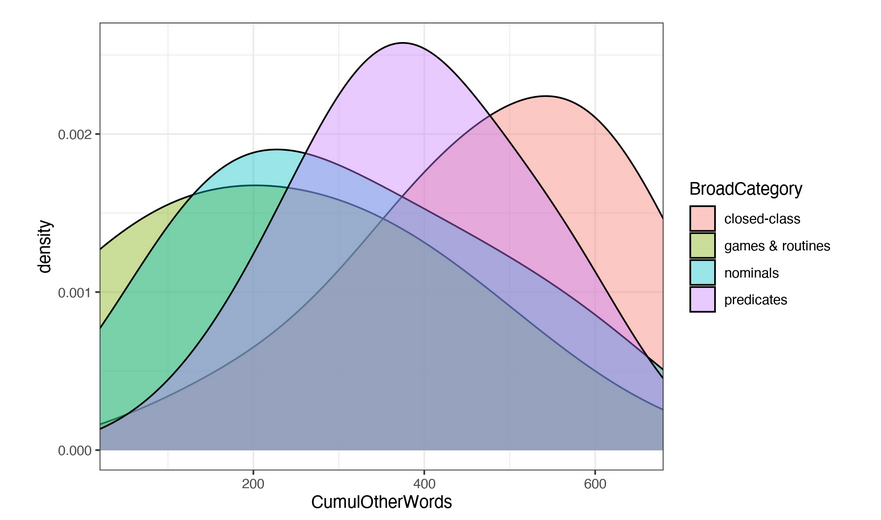

Ваша задача - с помощью ggplot визуализировать график возраста освоения слов (Age of Acquisition) по группам BroadCategory, тема - theme_bw. В геоме плотности используйте аргумент сглаживания adjust со значением 2. Подпишите оси и график понятным читателю образом. В комментарии приведен пример использования функции scale_x_continuous в ggplot. С ее помощью подпишите ось X так, чтобы была ясна разбивка по полугоду (то есть 12, 18 месяцев и т. д.).

In [93]:
options(repr.plot.width=10, repr.plot.height=8)

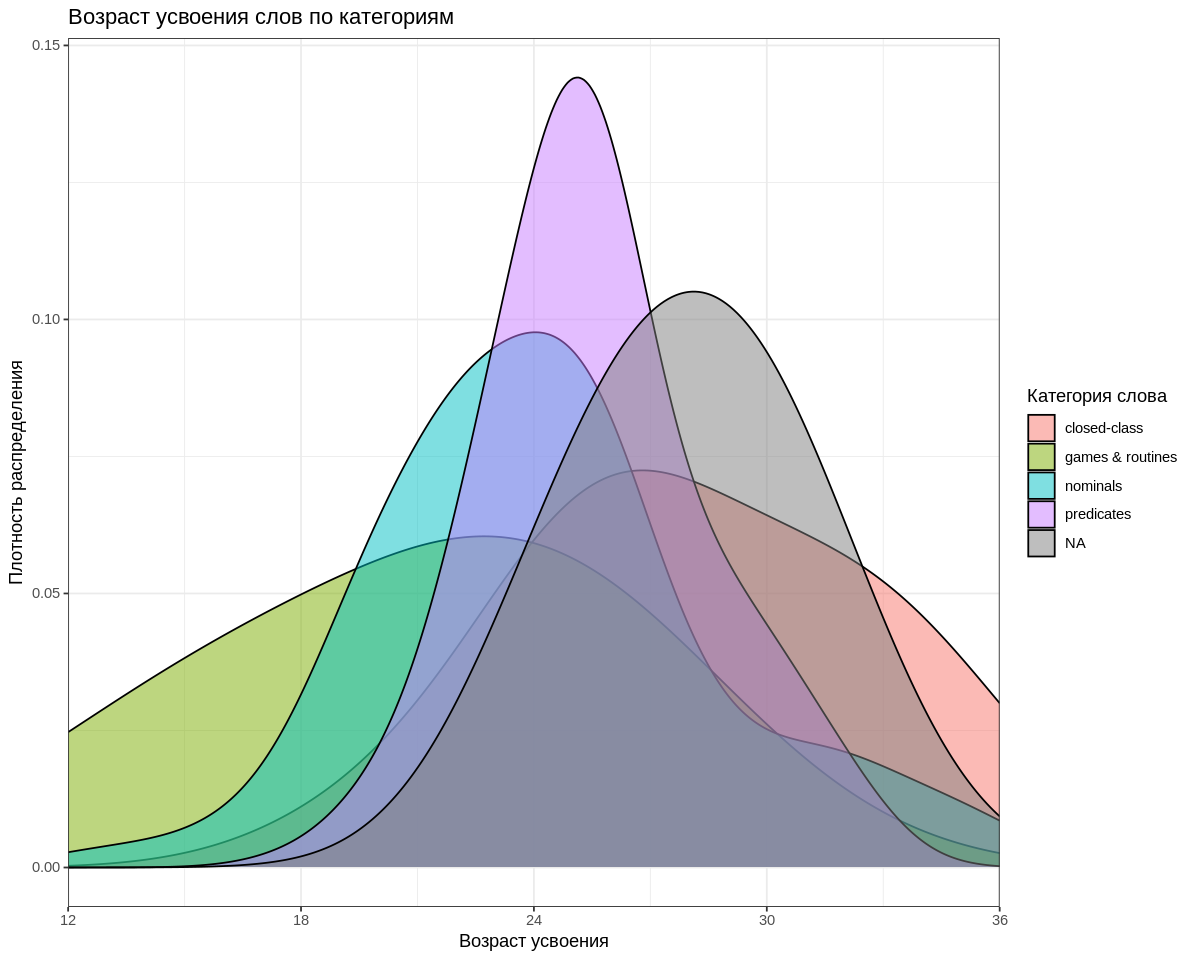

In [97]:
Norwegian_data %>%
  ggplot(aes(AgeOfAcq, fill=BroadCategory)) +
   geom_density(alpha = 0.5, adjust=2) +
   theme_bw() +
   scale_x_continuous(expand=c(0, 0), breaks = seq(0, 36, by = 6)) +
    xlab("Возраст усвоения") + ylab("Плотность распределения") +
    ggtitle("Возраст усвоения слов по категориям")+
    labs(fill = "Категория слова")

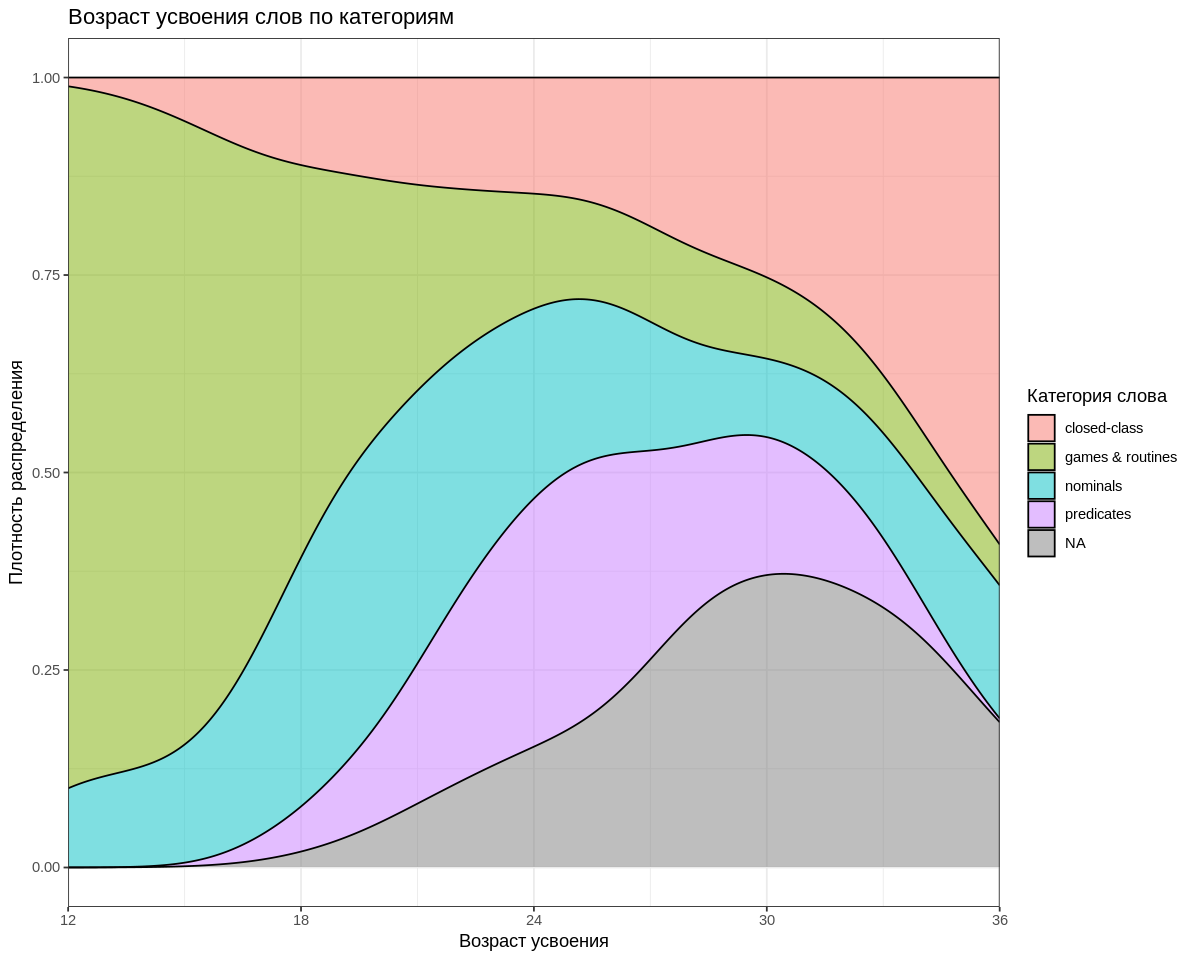

In [98]:
# дополнительный график плотности
Norwegian_data %>%
  ggplot(aes(AgeOfAcq, fill=BroadCategory)) +
   geom_density(alpha = 0.5, adjust=2, position = "fill") +
   theme_bw() +
   scale_x_continuous(expand=c(0, 0), breaks = seq(0, 36, by = 6)) +
    xlab("Возраст усвоения") + ylab("Плотность распределения") +
    ggtitle("Возраст усвоения слов по категориям")+
    labs(fill = "Категория слова")

### 3.3 Интерпретация графика плотности

```
Слова из группы games & routines наиболее активно усваиваются детьми примерно
до 30 месяцев, и в течение первых 18 месяцев эта категория является преобладающей.

В 15 месяцев начинается резкий рост усвоения слов из категории nominals,
который продолжается также до 30 месяцев, а пик усвоения приходится на 24
месяца.

Затем, с разницей примерно в 3-4 месяца, начинаются еще два периода резкого
роста усвоения -- категории predicates (19-30 мес.), closed-class (18 мес-3+ лет)
а также остальных слов, не принадлежащих ни к оной категории (21-35 мес.).
При этом распреление плотности для этой категории исключительно "сжат",
из чего можно сделать вывод, что бОльшая часть детей усваивает слова из
категории predicates в возрасте около 25 месяцев.

```

### 3.4 Возраст освоения VS кумулятивное количество ранее освоенных слов

Постройте график рассеяния по переменным AgeOfAcq и CumulOtherWords, как показано ниже. Здесь использован геом geom_count с разбросом точек (jitter) и прозрачностью 0.5. Палитра - базовая. Предварительно, удалите из данных строки, для которых не указана BroadCategory (NA).



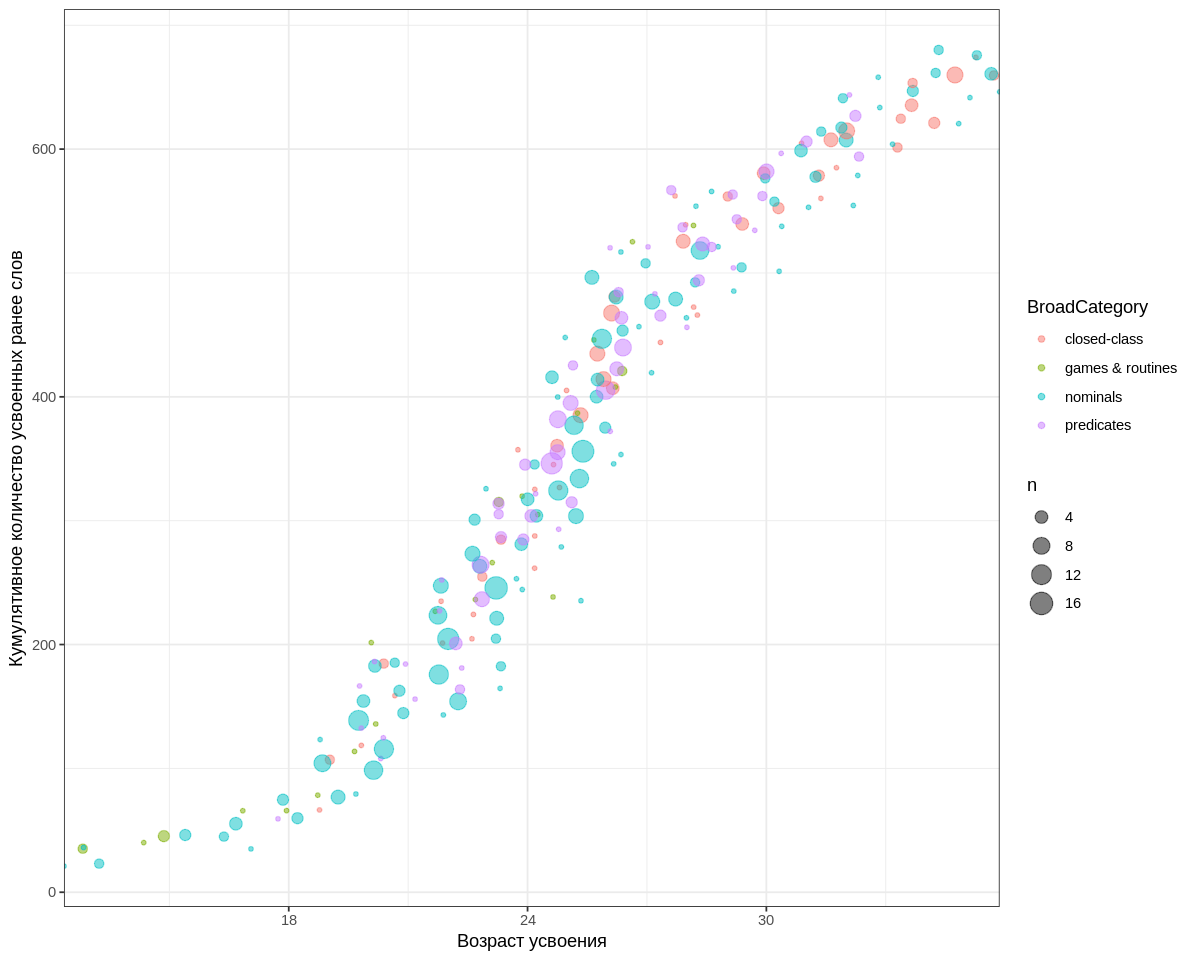

In [100]:
Norwegian_data %>% drop_na(BroadCategory) %>%
  ggplot(aes(x=AgeOfAcq, y=CumulOtherWords,colour =BroadCategory)) +
   geom_count(alpha = 0.5, position='jitter') +
  theme_bw() +
   scale_x_continuous(expand=c(0, 0), breaks = seq(0, 36, by = 6)) +
    xlab("Возраст усвоения") + ylab("Кумулятивное количество усвоенных ранее слов")

#### 3.5 Условия для проведения корреляционного анализа

Условием для проведения корреляционного анализа Пирсона является нормальное распределение данных.
Раскомментируйте код ниже, чтобы визуально оценить нормальность распределения переменной AgeOfAcq по графику QQ-plot (quantile-quantile plot). Данные откладываются по оси y, а по оси x откладываются значения, которые бы данные имели, если бы они были идеально нормальными (теоретические квантили). Если данные в выборке нормально распределены, все точки будут лежать на прямой. Полоса вокруг прямой показывает 95% доверительный интервал: если практически все точки попадают в этот интервал, это сильное свидетельство в пользу того, что данные в выборке распределены нормально. Данные распределены ненормально, если они образуют ломаный или сильно изогнутый паттерн, а также если они далеко отходят от прямой в той или иной области.

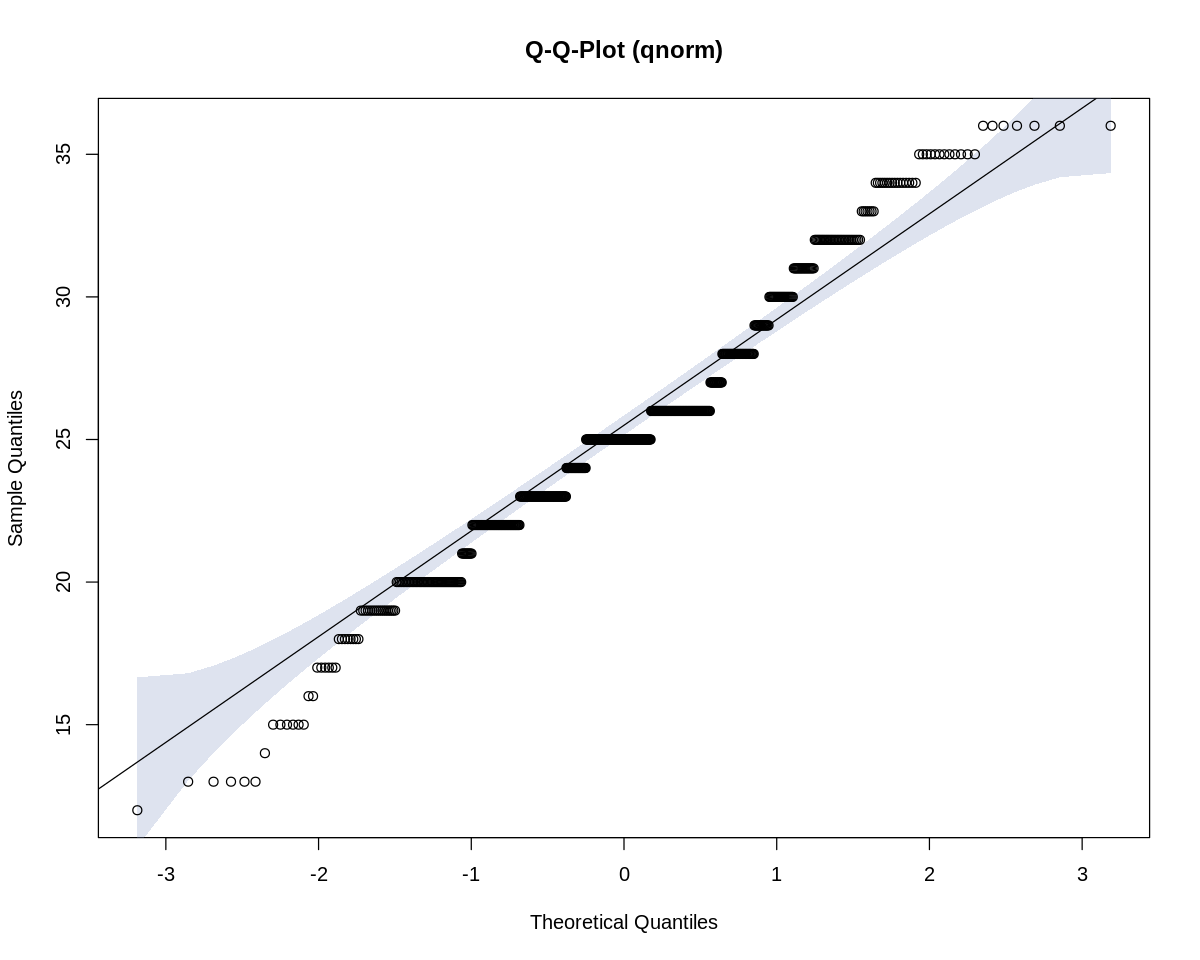

In [101]:
library(DescTools)
PlotQQ(Norwegian_data$AgeOfAcq)

Постройте QQ-plot для переменной CumulOtherWords.

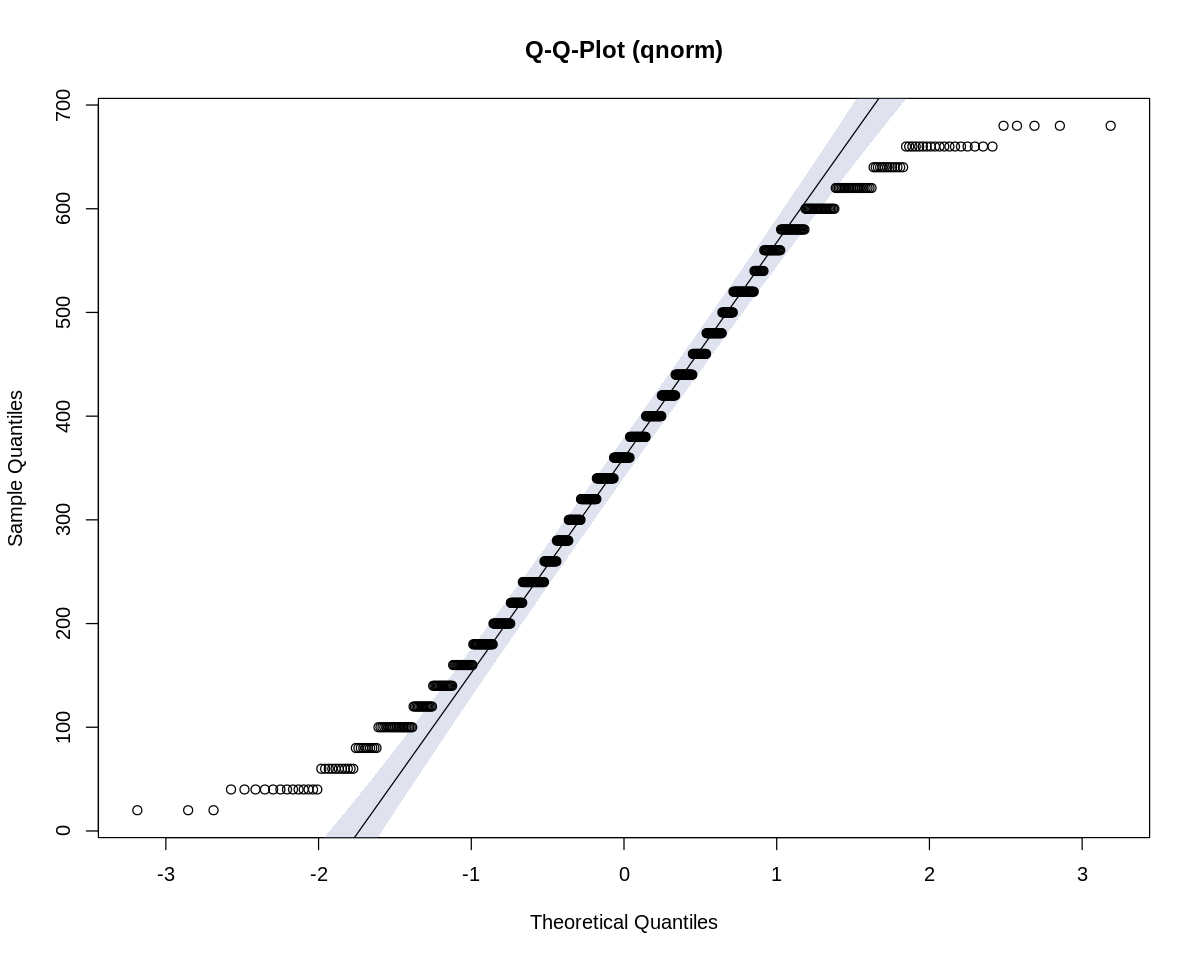

In [103]:
PlotQQ(Norwegian_data$CumulOtherWords)

#### 3.6 Корреляция AgeOfAcq и CumulOtherWords

С помощью функции cor.test проведите корреляционный анализ. Ваши выводы из предыдущего пункта (3.5) подскажут, какой метод вы должны использовать.

In [107]:
# AgeOfAcq и CumulOtherWords распределены ненормально, поэтому используем Коэффициент Спирмена/Кенделла
cor.test(Norwegian_data$CumulOtherWords, Norwegian_data$AgeOfAcq, method = 'spearman')


	Pearson's product-moment correlation

data:  Norwegian_data$CumulOtherWords and Norwegian_data$AgeOfAcq
t = 92.832, df = 693, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9561038 0.9672313
sample estimates:
      cor 
0.9620656 


#### 3.7 Интерпретация результатов теста

```
Согласно результатам теста Спирмена/Кенделла, мы можем сделать вывод, что между
возрастом усвоения и кумулятивным количеством усвоенных слов есть значительная
степень положительной корреляции: коэффициент корелляции 0.985029, p-value -> 0
```

#### 3.8 Степень свободы

Сравните количество строк в датасете, по которому проводился корреляционный анализ, и степень свободы (df), указанную в результатах теста. Как получилось число df?

In [106]:
# количество строк в изначальном датасете
nrow(Norwegian_data)

[1] 695

In [108]:
# df = 693
cor.test(Norwegian_data$CumulOtherWords, Norwegian_data$AgeOfAcq, method = 'pearson')


	Pearson's product-moment correlation

data:  Norwegian_data$CumulOtherWords and Norwegian_data$AgeOfAcq
t = 92.832, df = 693, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9561038 0.9672313
sample estimates:
      cor 
0.9620656 


```
Исходя из вычислений выше, можно сделать вывод, что df можно получить по формуле N-2, где N - размер выборки (количество строк в датасете).
```